### This is the version of 4 regression models on Imputed_Data_Accepted imputed data with 'DRG PROGRAM' grouped.

In [1]:
# IMPORT MODULES

import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# from sklearn.utils.fixes import signature
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# import tensorflow as tf
# from keras import models, regularizers, layers, optimizers, losses, metrics
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.utils import np_utils
# from keras.utils import to_categorical

print(os.getcwd())
print("Modules imported \n")
import os
# print(os.listdir("../input/"))

/Users/aurorazheng/Documents/datafest
Modules imported 



In [3]:
data = pd.read_excel('../datafest/Imputed_Data_Accepted.xlsx')
print("With id", data.shape)
data_full = data
print("No id",data_full.shape)

With id (474, 21)
No id (474, 21)


In [4]:
df_los = data_full.dropna(subset=['LOS'])
df_los

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,Infection Precaution,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS Outlier,Discharge Disposition,Age,LOS,ICU LOS
0,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Telemetry,Orthopaedic Surgery,ER,Mrsa,...,Yes,Bloodless,Female,Craniotomy,Medicaid Managed Care,Outlier,Hospice,78.0,9.830506,3.002536
1,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,ER,Covid Positive,...,Yes,Private Room,Male,Lymphoma,Medicare Managed Care,Outlier,Acute-Another Hosp,56.0,6.000000,3.000000
2,Accepted,Bakersfield Memorial,Citrus Valley,False,False,"Surgery, Otorhino",Telemetry,Surgical Evaluation/Surgery,Home,R/O Covid (Pui),...,Yes,Private Room,Female,Other General Medicine,Medicaid Managed Care,Outlier,Home Health Org,60.0,10.033178,3.455110
3,Accepted,Norris Cancer Hospital,Downey,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,Acute Rehab,Mrsa,...,Yes,Private Room,Female,Infectious Disease,Managed Exchange,Outlier,Expired,53.0,2.000000,2.000000
4,Accepted,Hollywood Presbyterian,Citrus Valley,False,False,Nephrology,Telemetry,Orthopaedic Surgery,ER,Covid Positive,...,Yes,Bloodless,Female,Lower Joint Revision,Medicaid Managed Care,Outlier,Intermediate Care,42.0,10.235850,3.907683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Accepted,Valley Presbyterian,Downey,True,False,Internal Medicin- Hospitalist,Telemetry,Surgical Evaluation/Surgery,ER,Covid Positive,...,Yes,Private Room,Female,Other Gi Medicine,Medicaid Managed Care,Outlier,Home/Self Care,63.0,6.000000,0.000000
470,Accepted,Verdugo Hills,Arcadia,False,False,Cardiology,Stepdown,Surgical Evaluation/Surgery,Home,Immuno Compromised,...,Yes,Private Room,Female,Percutaneous Cardiac Procedures,Medicare,Outlier,Home/Self Care,75.0,2.000000,0.000000
471,Accepted,County Lac Usc,Citrus Valley,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,Immuno Compromised,...,Yes,Private Room,Female,Fracture/Injury,Medicare,Outlier,Home Health Org,46.0,5.000000,0.000000
472,Accepted,Garfield,Citrus Valley,False,False,"Surgery, Neurolo- Spine",Med/Surg,Orthopaedic Surgery,Home,Immuno Compromised,...,Yes,Bloodless,Male,Hand Surgery,Medicaid,Outlier,Rehab,49.0,10.157033,3.731682


In [5]:
data_full.info()
data_full.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Request Status                                     474 non-null    object 
 1   Transfer Referral Source                           474 non-null    object 
 2   County                                             474 non-null    object 
 3   Transfer Back Agreement                            474 non-null    bool   
 4   LOA (Mark X if Yes)                                474 non-null    bool   
 5   Accepting Physician Specialty                      474 non-null    object 
 6   Required Level Of Care                             474 non-null    object 
 7   Requested Treatment Intervention                   474 non-null    object 
 8   From Where Patient Admitted to Referring Facility  474 non-null    object 
 9   Infection 

,Age,LOS,ICU LOS
count,474.000000,474.000000,474.000000
mean,58.513800,10.049912,3.492477
std,17.105175,11.595429,8.714988
min,18.000000,1.000000,0.000000
25%,46.250000,4.000000,0.000000
50%,60.000000,9.706651,2.000000
75%,71.000000,10.224590,3.693968
max,90.000000,132.000000,132.000000


In [6]:
data_full.head(5)

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,Requested Treatment Intervention,From Where Patient Admitted to Referring Facility,Infection Precaution,...,EMTALA Y/N(Patient Status Details),Special Considerations,Gender,DRG Program,Payor,LOS Outlier,Discharge Disposition,Age,LOS,ICU LOS
0,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Telemetry,Orthopaedic Surgery,ER,Mrsa,...,Yes,Bloodless,Female,Craniotomy,Medicaid Managed Care,Outlier,Hospice,78.0,9.830506,3.002536
1,Accepted,Presbyterian Intercommunity (Pih),Whittier,True,False,Neurology-Stroke,Med/Surg,Medical Management/Optimization,ER,Covid Positive,...,Yes,Private Room,Male,Lymphoma,Medicare Managed Care,Outlier,Acute-Another Hosp,56.0,6.000000,3.000000
2,Accepted,Bakersfield Memorial,Citrus Valley,False,False,"Surgery, Otorhino",Telemetry,Surgical Evaluation/Surgery,Home,R/O Covid (Pui),...,Yes,Private Room,Female,Other General Medicine,Medicaid Managed Care,Outlier,Home Health Org,60.0,10.033178,3.455110
3,Accepted,Norris Cancer Hospital,Downey,False,False,"Surgery, Trauma",ICU,Surgical Evaluation/Surgery,Acute Rehab,Mrsa,...,Yes,Private Room,Female,Infectious Disease,Managed Exchange,Outlier,Expired,53.0,2.000000,2.000000
4,Accepted,Hollywood Presbyterian,Citrus Valley,False,False,Nephrology,Telemetry,Orthopaedic Surgery,ER,Covid Positive,...,Yes,Bloodless,Female,Lower Joint Revision,Medicaid Managed Care,Outlier,Intermediate Care,42.0,10.235850,3.907683


In [7]:
# Label = LOS
y = df_los['LOS']
X = df_los.drop('LOS', 1)

print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (474,)
X - No Label No id  (474, 20)
Index(['Request Status', 'Transfer Referral Source', 'County',
       'Transfer Back Agreement', 'LOA (Mark X if Yes)',
       'Accepting Physician Specialty', 'Required Level Of Care',
       'Requested Treatment Intervention',
       'From Where Patient Admitted to Referring Facility',
       'Infection Precaution', 'Patient Status',
       'EMTALA Y/N(Patient Status Details)', 'Special Considerations',
       'Gender', 'DRG Program', 'Payor', 'LOS Outlier',
       'Discharge Disposition', 'Age', 'ICU LOS'],
      dtype='object')


Based on discussion, the features and attributes that we care most are Patient Status, DRG PROGRAM, LOS Outlier, Discharge Disposition and Age. let's see how each of them distributed. 

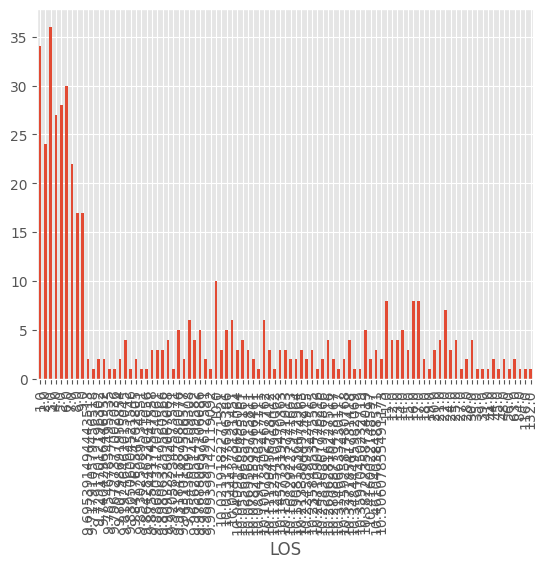

In [8]:
df_los.groupby('LOS').size().plot.bar()
plt.show()

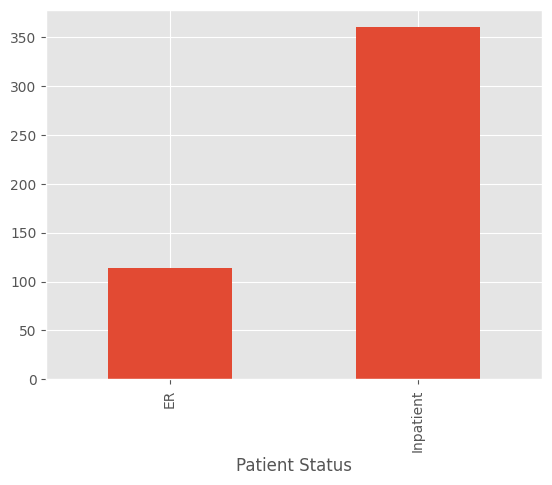

In [9]:
df_los.groupby('Patient Status').size().plot.bar()
plt.show()

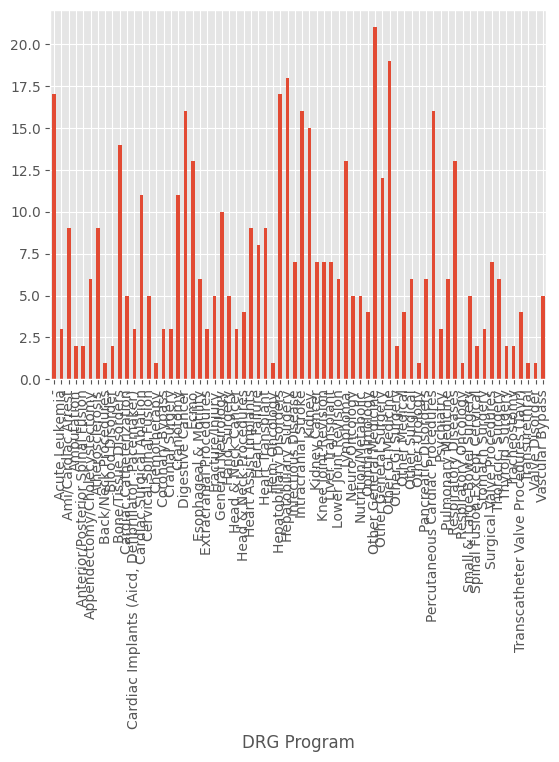

In [10]:
df_los.groupby('DRG Program').size().plot.bar()
plt.show()

#### Group the lower portion of categories to one bigger categories

In [11]:
total = df_los['DRG Program'].count()
value_counts = df_los['DRG Program'].value_counts(normalize=True)
df_counts = pd.DataFrame({'value': value_counts.index, 'count': value_counts.values})
df_counts['portion'] = df_counts['count'].apply(lambda x: x/total)
df_counts = df_counts.sort_values(by='portion', ascending=False)
df_counts

,value,count,portion
0,Other General Medicine,0.044304,0.000093
1,Other Gi Medicine,0.040084,0.000085
2,Hepatobiliary Surgery,0.037975,0.000080
3,-,0.035865,0.000076
4,Hepatobiliary Disorders,0.035865,0.000076
...,...,...,...
63,Valve Disorder,0.002110,0.000004
64,Back/Neck Procedures,0.002110,0.000004
65,Chemotherapy,0.002110,0.000004
66,Transurethral,0.002110,0.000004


In [12]:
counts = df_los['DRG Program'].value_counts().sort_values(ascending=False)
threshold = counts.quantile(0.8)
df_los['DRG Program'] = [x if counts[x] >= threshold and x != '-' else 'Other' for x in df_los['DRG Program']]
df_los['DRG Program']


0                                Other
1                             Lymphoma
2               Other General Medicine
3                                Other
4                                Other
                    ...               
469                  Other Gi Medicine
470    Percutaneous Cardiac Procedures
471                              Other
472                              Other
473              Hepatobiliary Surgery
Name: DRG Program, Length: 474, dtype: object

In [13]:
counts = df_los['DRG Program'].value_counts().sort_values(ascending=False)
counts

Other                              271
Other General Medicine              21
Other Gi Medicine                   19
Hepatobiliary Surgery               18
Hepatobiliary Disorders             17
Intracranial Stroke                 16
Digestive Cancer                    16
Percutaneous Cardiac Procedures     16
Kidney                              15
Bone/Tissue Disorders               14
Lymphoma                            13
Ecmo                                13
Respiratory Diseases                13
Other General Surgery               12
Name: DRG Program, dtype: int64

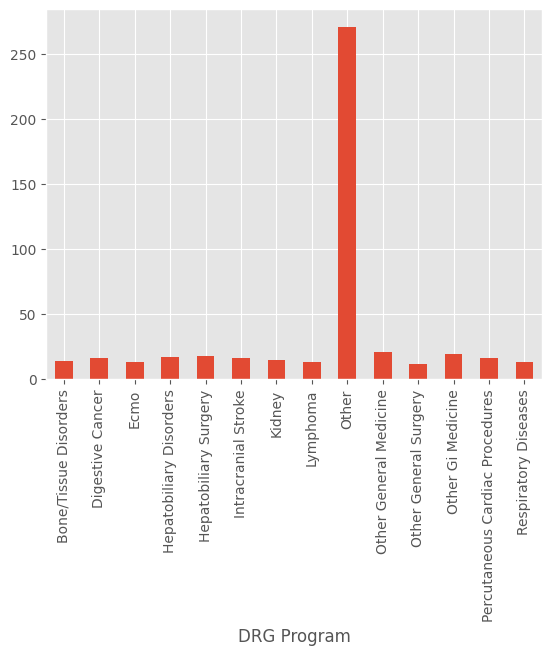

In [14]:
df_los.groupby('DRG Program').size().plot.bar()
plt.show()

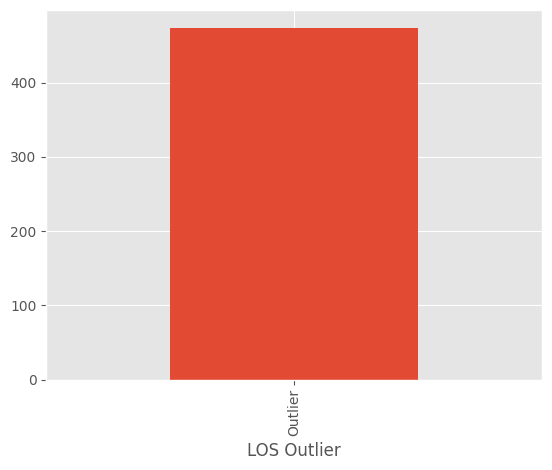

In [15]:
df_los.groupby('LOS Outlier').size().plot.bar()
plt.show()

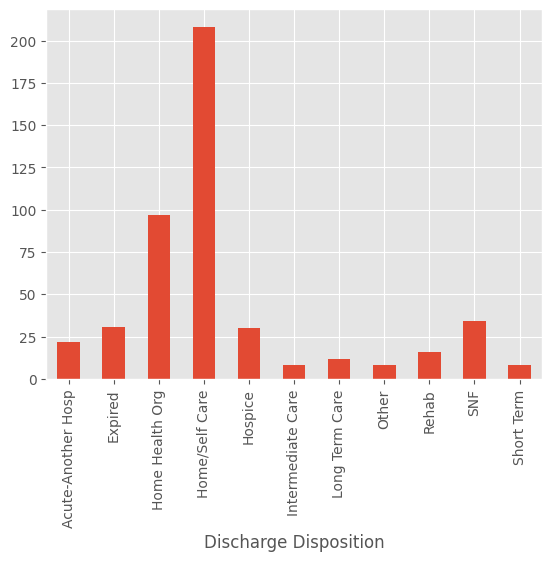

In [16]:
df_los.groupby('Discharge Disposition').size().plot.bar()
plt.show()

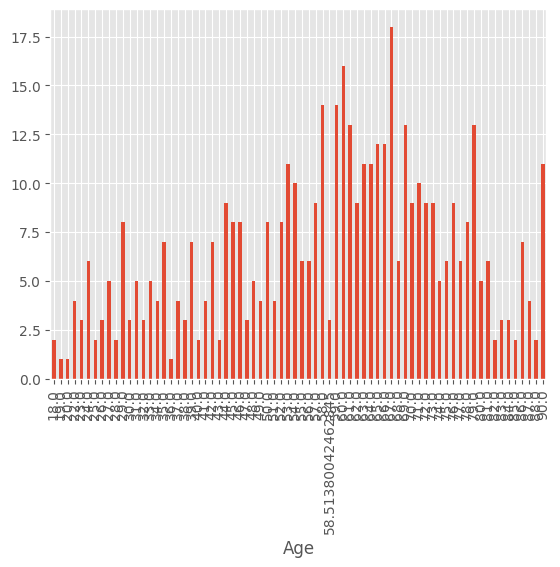

In [17]:
df_los.groupby('Age').size().plot.bar()
plt.show()

#### Patient Status, DRG PROGRAM, LOS Outlier, Discharge Disposition are all categorical features, it's necessary to convert categorical features to numerical. I use one-hot-encoding here

In [18]:
#                     
categorical_columns = [
                    'DRG Program',
                    'Patient Status',                     
                    'Discharge Disposition'
                      ]
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(X.shape)

(474, 98)


In [19]:
#                     
categorical_columns = [
                    'DRG Program',
                    'Patient Status',                     
                    'Discharge Disposition'
                      ]
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in df_los.columns:
        one_hot_encoded = pd.get_dummies(df_los[col])
        df_los = df_los.drop(col, axis=1)
        df_los = df_los.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(df_los.shape)

(474, 45)


In [22]:
print(df_los.shape)
print(X.shape)
#XnotNorm = np.array(X.copy())
XnotNorm = df_los.copy()
print('XnotNorm ', XnotNorm.shape)

ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)

(474, 45)
(474, 98)
XnotNorm  (474, 45)
ynotNorm  (474,)


In [23]:
XnotNorm = XnotNorm.drop('Accepting Physician Specialty',1)
XnotNorm = XnotNorm.drop('Required Level Of Care',1)
XnotNorm = XnotNorm.drop('Requested Treatment Intervention',1)
XnotNorm = XnotNorm.drop('Gender',1)
XnotNorm = XnotNorm.drop('Payor',1)
XnotNorm = XnotNorm.drop('LOA (Mark X if Yes)', 1)
XnotNorm = XnotNorm.drop('From Where Patient Admitted to Referring Facility', 1)
XnotNorm = XnotNorm.drop('EMTALA Y/N(Patient Status Details)', 1)
XnotNorm = XnotNorm.drop('Special Considerations', 1)
XnotNorm = XnotNorm.drop('Transfer Back Agreement', 1)
XnotNorm = XnotNorm.drop('Transfer Referral Source', 1)
XnotNorm = XnotNorm.drop('Infection Precaution',1)
XnotNorm = XnotNorm.drop('Request Status',1)
XnotNorm = XnotNorm.drop('LOS',1)
XnotNorm = XnotNorm.drop('ICU LOS',1)
XnotNorm = XnotNorm.drop('LOS Outlier',1)
XnotNorm = XnotNorm.drop('County',1)
# XnotNorm = XnotNorm.drop('DRG PROGRAM',1)
XnotNorm.columns


Index(['Age', 'Bone/Tissue Disorders', 'Digestive Cancer', 'Ecmo',
       'Hepatobiliary Disorders', 'Hepatobiliary Surgery',
       'Intracranial Stroke', 'Kidney', 'Lymphoma', 'Other_left',
       'Other General Medicine', 'Other General Surgery', 'Other Gi Medicine',
       'Percutaneous Cardiac Procedures', 'Respiratory Diseases', 'ER',
       'Inpatient', 'Acute-Another Hosp', 'Expired', 'Home Health Org',
       'Home/Self Care', 'Hospice', 'Intermediate Care', 'Long Term Care',
       'Other_right', 'Rehab', 'SNF', 'Short Term'],
      dtype='object')

In [24]:
ynotNorm

0       9.830506
1       6.000000
2      10.033178
3       2.000000
4      10.235850
         ...    
469     6.000000
470     2.000000
471     5.000000
472    10.157033
473    22.000000
Name: LOS, Length: 474, dtype: float64

In [25]:
# clean data
# 89+ to 89
XnotNorm.replace('Unknown', pd.np.nan, inplace=True)
XnotNorm.replace('89+', 90, inplace=True)

Normalize X

In [26]:
x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
#print(XNorm)
#print(y)
print('X normalized')

X normalized


In [27]:
XNorm.columns = XNorm.columns.astype(str) 
XNorm

,Age,Bone/Tissue Disorders,Digestive Cancer,Ecmo,Hepatobiliary Disorders,Hepatobiliary Surgery,Intracranial Stroke,Kidney,Lymphoma,Other_left,...,Expired,Home Health Org,Home/Self Care,Hospice,Intermediate Care,Long Term Care,Other_right,Rehab,SNF,Short Term
0,1.140403,-0.174456,-0.186908,-0.167927,-0.192871,-0.198680,-0.186908,-0.180775,-0.167927,0.865493,...,-0.264532,-0.507242,-0.884282,3.847077,-0.131024,-0.161165,-0.131024,-0.186908,-0.277980,-0.131024
1,-0.147117,-0.174456,-0.186908,-0.167927,-0.192871,-0.198680,-0.186908,-0.180775,5.954959,-1.155411,...,-0.264532,-0.507242,-0.884282,-0.259938,-0.131024,-0.161165,-0.131024,-0.186908,-0.277980,-0.131024
2,0.086978,-0.174456,-0.186908,-0.167927,-0.192871,-0.198680,-0.186908,-0.180775,-0.167927,-1.155411,...,-0.264532,1.971446,-0.884282,-0.259938,-0.131024,-0.161165,-0.131024,-0.186908,-0.277980,-0.131024
3,-0.322687,-0.174456,-0.186908,-0.167927,-0.192871,-0.198680,-0.186908,-0.180775,-0.167927,0.865493,...,3.780254,-0.507242,-0.884282,-0.259938,-0.131024,-0.161165,-0.131024,-0.186908,-0.277980,-0.131024
4,-0.966447,-0.174456,-0.186908,-0.167927,-0.192871,-0.198680,-0.186908,-0.180775,-0.167927,0.865493,...,-0.264532,-0.507242,-0.884282,-0.259938,7.632169,-0.161165,-0.131024,-0.186908,-0.277980,-0.131024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.262549,-0.174456,-0.186908,-0.167927,-0.192871,-0.198680,-0.186908,-0.180775,-0.167927,-1.155411,...,-0.264532,-0.507242,1.130861,-0.259938,-0.131024,-0.161165,-0.131024,-0.186908,-0.277980,-0.131024
470,0.964832,-0.174456,-0.186908,-0.167927,-0.192871,-0.198680,-0.186908,-0.180775,-0.167927,-1.155411,...,-0.264532,-0.507242,1.130861,-0.259938,-0.131024,-0.161165,-0.131024,-0.186908,-0.277980,-0.131024
471,-0.732353,-0.174456,-0.186908,-0.167927,-0.192871,-0.198680,-0.186908,-0.180775,-0.167927,0.865493,...,-0.264532,1.971446,-0.884282,-0.259938,-0.131024,-0.161165,-0.131024,-0.186908,-0.277980,-0.131024
472,-0.556782,-0.174456,-0.186908,-0.167927,-0.192871,-0.198680,-0.186908,-0.180775,-0.167927,0.865493,...,-0.264532,-0.507242,-0.884282,-0.259938,-0.131024,-0.161165,-0.131024,5.350234,-0.277980,-0.131024


In [29]:
# SPLIT into Train & Test

X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.2, random_state=7)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (379, 28)
X_test:  (95, 28)
y_train:  (379,)
y_test:  (95,)


In [30]:

# Test Models and evaluation metric
seed = 42
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
Mymodels.append(('LinearReg', LinearRegression()))
Mymodels.append(('Ridge', Ridge(alpha=0.5)))
Mymodels.append(('RandomForestRegressor', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)))
Mymodels.append(('Lasso', Lasso(alpha=0.1)))

# Evaluate each model in turn
results = []
names = []
# ,error_score='raise'
for name, model in Mymodels:
    # Train the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("%s mse: %f "% (name, mse))
    
    
    
#     kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
#     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg) 

LinearReg mse: 154.055117 
Ridge mse: 158.640543 
RandomForestRegressor mse: 156.233771 
Lasso mse: 156.403325 


# Linear Regressor

In [31]:
# Optimize hyper params for one model

Linearmodel = LinearRegression()

param_grid = [{},]

Linearmodel = GridSearchCV(Linearmodel, param_grid, cv=5, scoring=scoring)
Linearmodel.fit(XNorm, y)

print(Linearmodel.best_estimator_)

LinearRegression()


In [32]:
Linearmodel = LinearRegression()

In [33]:
Linearmodel.fit(XNorm, y)
final_predictions = Linearmodel.predict(X_test)
# Generate the R-squared
r2 = r2_score(y_test, final_predictions)
# cm = confusion_matrix(y_test, final_predictions)
print('R-squared:', r2)
mse = mean_squared_error(y_test, final_predictions)

print("Mean Squared Error:", mse)

R-squared: 0.2714017336534763
Mean Squared Error: 137.0441451758877


# Random Forest Regressor

In [34]:
# Optimize hyper params for one model

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

param_grid = [{},]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=5, random_state=42)


In [35]:
model = RandomForestRegressor(max_depth=5, random_state=42)

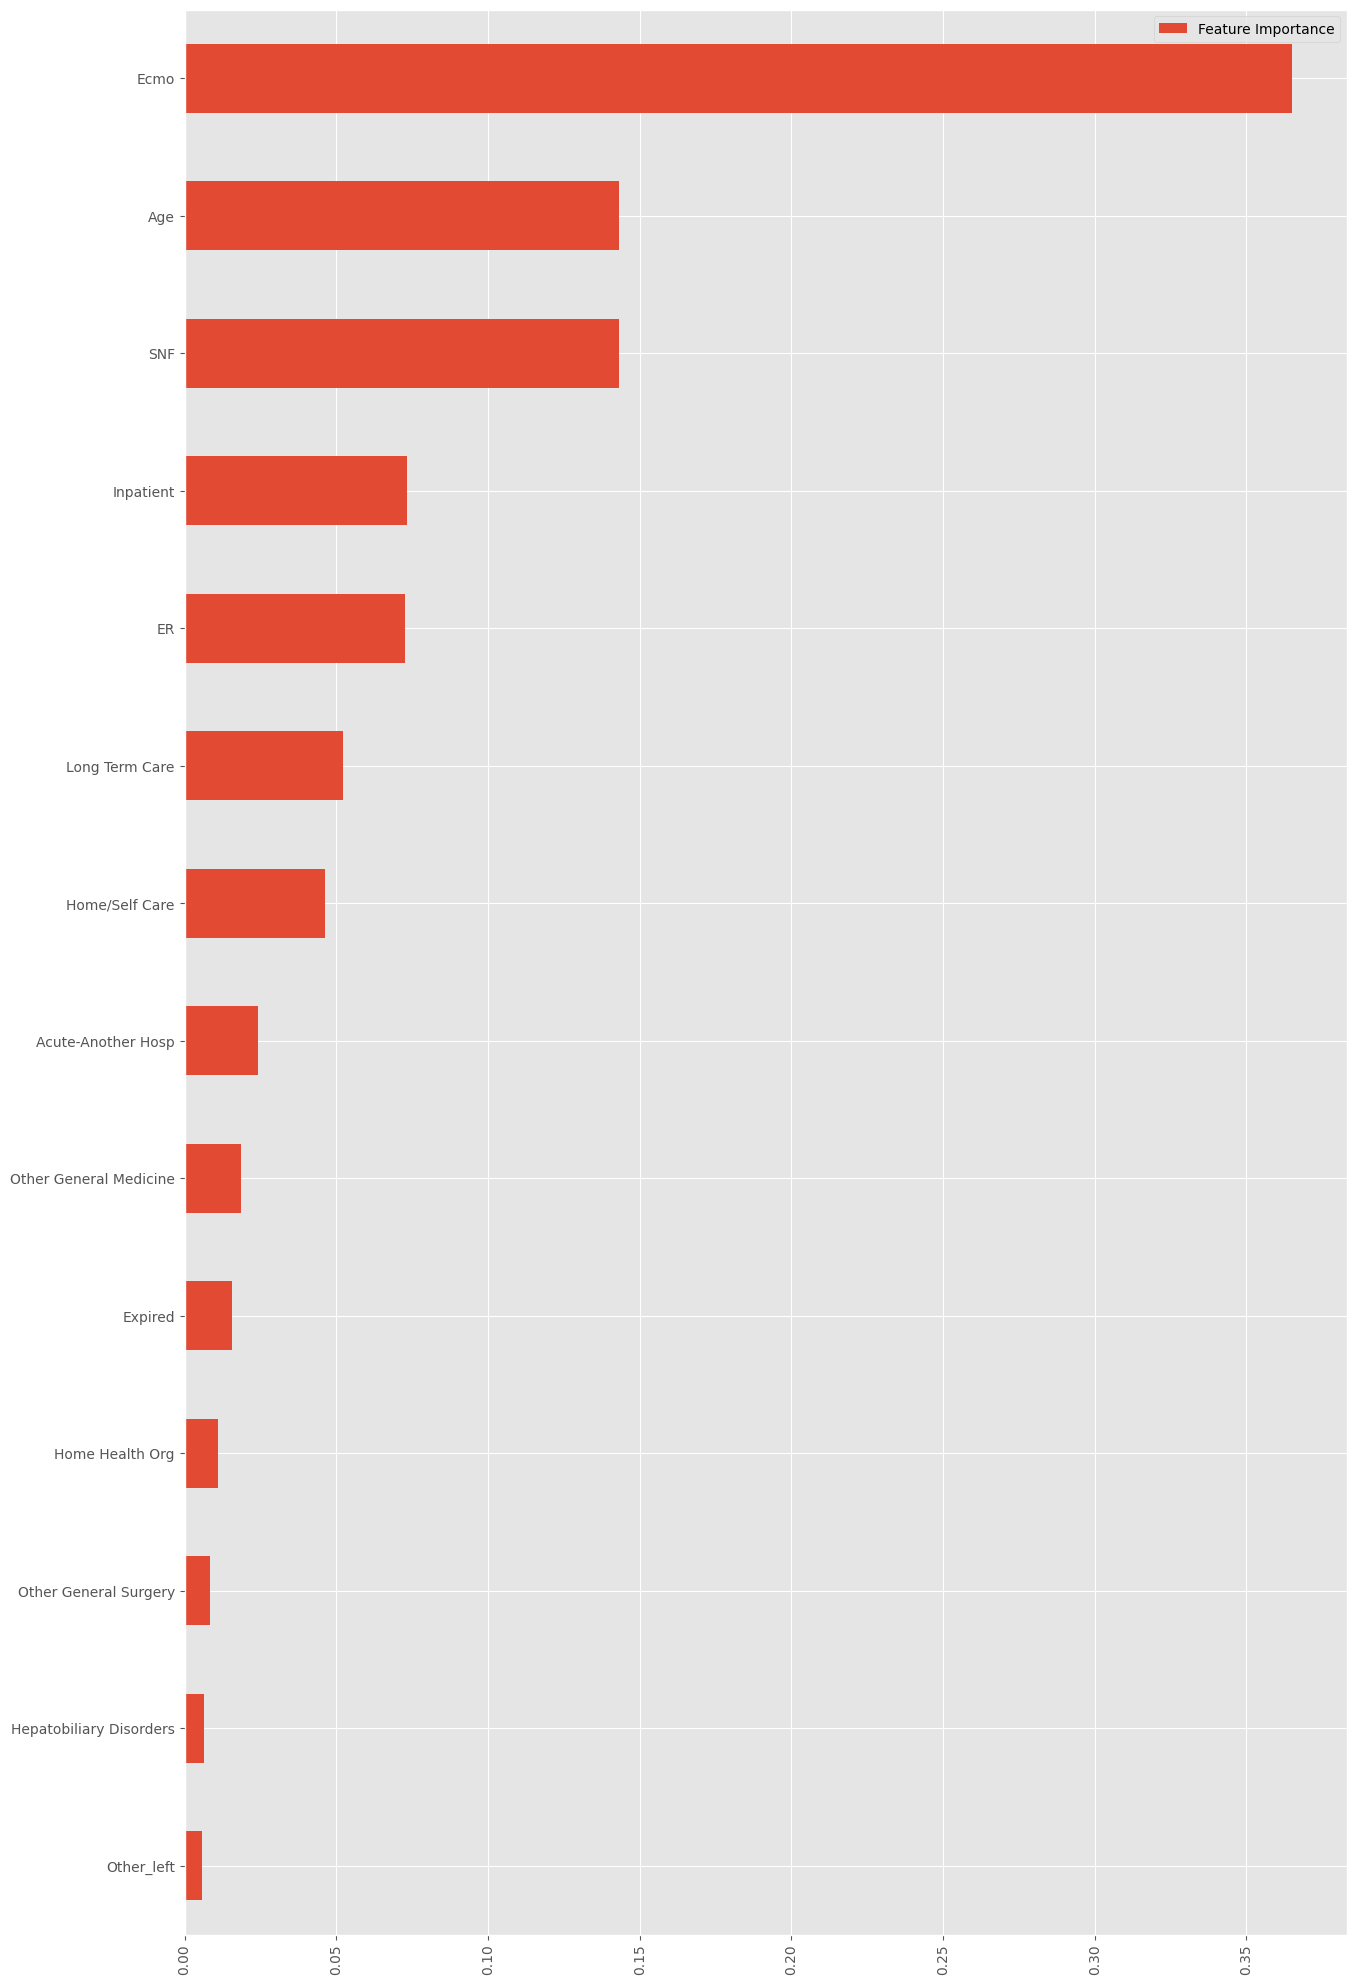

In [36]:
# FEATURE IMPORTANCE - NORMALIZED - last model

trainFinalFI = XNorm
yFinalFI = y

model.fit(trainFinalFI,yFinalFI)

FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model[FI_model["Feature Importance"] > 0.005].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

In [37]:
# List of important features for model
FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model=FI_model.sort_values('Feature Importance', ascending = False)
print(FI_model[FI_model["Feature Importance"] > 0.001])

                         Feature Importance
Ecmo                               0.364922
Age                                0.143308
SNF                                0.143200
Inpatient                          0.073410
ER                                 0.072491
Long Term Care                     0.052266
Home/Self Care                     0.046259
Acute-Another Hosp                 0.024200
Other General Medicine             0.018440
Expired                            0.015640
Home Health Org                    0.011067
Other General Surgery              0.008460
Hepatobiliary Disorders            0.006509
Other_left                         0.005870
Hospice                            0.004916
Rehab                              0.003454
Hepatobiliary Surgery              0.002465
Bone/Tissue Disorders              0.001736


In [38]:
# Model fit and evaluation on test

final_predictions = model.predict(X_test)


In [39]:
# Generate the R-squared
r2 = r2_score(y_test, final_predictions)
print('R-squared:', r2)
mse = mean_squared_error(y_test, final_predictions)
print("Mean Squared Error:", mse)


R-squared: 0.8154157421164402
Mean Squared Error: 34.71898438823227


# Ridge

In [40]:
# Optimize hyper params for one model

Ridgemodel = Ridge(alpha=0.5)

param_grid = [{},]

grid_search = GridSearchCV(Ridgemodel, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

Ridge(alpha=0.5)


In [41]:
# Model fit and evaluation on test
trainFinalFI = XNorm
yFinalFI = y

Ridgemodel.fit(trainFinalFI,yFinalFI)

Ridge_pred = Ridgemodel.predict(X_test)




In [42]:
# Generate the R-squared
r2 = r2_score(y_test, Ridge_pred)
print('R-squared:', r2)
mse = mean_squared_error(y_test, Ridge_pred)

print("Mean Squared Error:", mse)

R-squared: 0.2926590630177528
Mean Squared Error: 133.0457929068692


# Lasso

In [43]:
# Optimize hyper params for one model

Lassomodel = Lasso(alpha=0.1)
param_grid = [{},]
grid_search = GridSearchCV(Lassomodel, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

Lasso(alpha=0.1)


In [44]:
# Model fit and evaluation on test
trainFinalFI = XNorm
yFinalFI = y
Lassomodel.fit(trainFinalFI,yFinalFI)
Lasso_pred = Lassomodel.predict(X_test)


In [45]:
# Generate the R-squared
r2 = r2_score(y_test, Lasso_pred)
print('R-squared:', r2)
mse = mean_squared_error(y_test, Lasso_pred)
print("Mean Squared Error:", mse)

R-squared: 0.287694807291795
Mean Squared Error: 133.97953405589746
